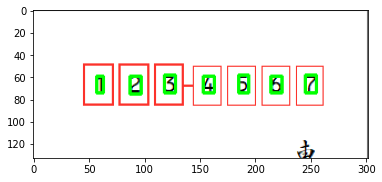

In [38]:
import cv2
import matplotlib.pyplot as plt

def detect_zipcode(filename):
    img = cv2.imread(filename)
    h, w = img.shape[:2]
    # 画像の右上のみを抽出
    img = img[0:h//5, w//3:]

    # 二値化
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    gray = cv2.GaussianBlur(gray, (3, 3), 0)
    img2 = cv2.threshold(gray, 200, 255, cv2.THRESH_BINARY_INV)[1]

    # 輪郭抽出
    cnts = cv2.findContours(img2, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)[0]

    # 結果
    ret = []
    for pt in cnts:
        x, y, w, h = cv2.boundingRect(pt)
        if not(4 < w < 15):
            continue
        ret.append([x, y, w, h])

    # xで昇順ソート
    ret = sorted(ret, key=lambda x: x[0])

    # 近似を除外
    ret2 = []
    lastx = -100
    for x, y, w, h in ret:
        if (x - lastx) < 10:
            continue
        ret2.append([x, y, w, h])
        lastx = x

    # 描画
    img_n = img.copy()
    for x, y, w, h in ret2:
        cv2.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), thickness=2)

    return ret2, img, img_n

# 葉書から郵便番号を取得
cnts, img, img_n = detect_zipcode('./hagaki.png')

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

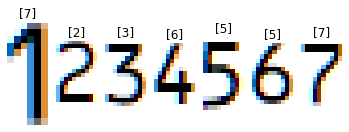

In [43]:
from sklearn.externals import joblib

# モデル
clf = joblib.load('./digits.pkl')

for i, pt in enumerate(cnts):
    x, y, w, h = pt

    # 数字だけ抽出
    img2 = img_n[y:y+h, x:x+w]

    # 二値化
    gray = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)
    # リサイズ
    gray = cv2.resize(gray, (8, 8))
    # ネガポジ反転
    gray = 15 - gray // 16
    # 一次元化
    gray = gray.reshape((-1, 64))

    # 予測
    ret = clf.predict(gray)

    plt.subplot(1, 7, i+1)
    plt.imshow(img2)
    plt.axis('off')
    plt.title(ret)

plt.show()

In [44]:
4/7

0.5714285714285714